In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
smo_people = pd.read_csv('Raw Datasets/russia_losses_personnel.csv')
smo_equipment = pd.read_csv('Raw Datasets/russia_losses_equipment.csv')

In [3]:
smo_people.sample(5)

,date,day,personnel,personnel*,POW
134,2022-07-09,136,37200,about,NaN
20,2022-03-17,22,14000,about,405.0
165,2022-08-09,167,42640,about,NaN
126,2022-07-01,128,35750,about,NaN
140,2022-07-15,142,38000,about,NaN


In [4]:
smo_equipment.sample(5)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
53,2022-04-19,55,169,150,802,2063,386,132,1495.0,76.0,158,8,67,27.0,4.0,NaN,NaN,NaN
193,2022-09-06,195,236,207,2077,4484,1179,296,NaN,NaN,876,15,156,109.0,NaN,Donetsk,3305.0,209.0
168,2022-08-12,170,233,193,1849,4108,975,261,NaN,NaN,778,15,136,90.0,NaN,Donetsk,3021.0,185.0
107,2022-06-12,109,212,178,1430,3484,715,226,NaN,NaN,582,13,97,54.0,NaN,Sievierodonetsk and Bakhmut,2455.0,125.0
160,2022-08-04,162,223,191,1789,4026,946,260,NaN,NaN,742,15,118,83.0,NaN,Bakhmut and Donetsk,2960.0,182.0


In [5]:
smo_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        227 non-null    object 
 1   day         227 non-null    int64  
 2   personnel   227 non-null    int64  
 3   personnel*  227 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.0+ KB


In [6]:
smo_people = smo_people.drop(['personnel*', 'POW'], axis = 1)
smo_people.to_csv('Visualization/smo_people_loss.csv')

In [7]:
smo_equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       227 non-null    object 
 1   day                        227 non-null    int64  
 2   aircraft                   227 non-null    int64  
 3   helicopter                 227 non-null    int64  
 4   tank                       227 non-null    int64  
 5   APC                        227 non-null    int64  
 6   field artillery            227 non-null    int64  
 7   MRL                        227 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      227 non-null    int64  
 11  naval ship                 227 non-null    int64  
 12  anti-aircraft warfare      227 non-null    int64  
 13  special equipment          208 non-null    float64

#### Investigate 
   - *POW* and *personnel* in `smo_people`, 
   - *military auto* \ *fuel tank* \ *special equipment* \ *mobile SRBM system* \ *greatest losses direction* \ *vehicles and fuel tanks* \ *cruise missles* in `smo_equipment` for **reasons of NA values** 

<AxesSubplot:>

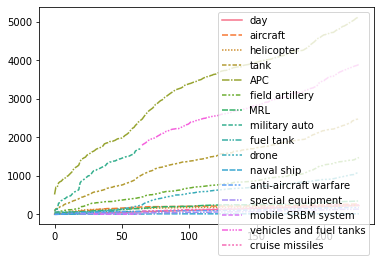

In [8]:
sns.lineplot(data=smo_equipment)

<AxesSubplot:>

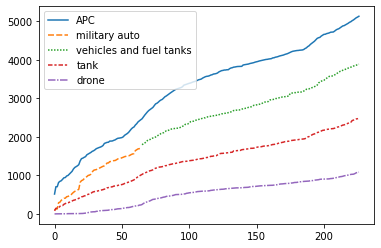

In [9]:
large_equipment_loss = smo_equipment[['APC', 'military auto', 'vehicles and fuel tanks', 'tank', 'drone']]
sns.lineplot(data=large_equipment_loss)

#### ***military auto*** and ***vehicles and fuel tanks*** are the same feature, we will call them as `military auto`
- In addition, ***special equipment***, ***mobile SRBM system***, ***cruise missiles*** will be dropped for lack of meaning/interpretation (What does a loss in ***cruise missiles*** mean? Don't missiles supposed be destroyed upon impact?)

In [10]:
greatest_losses_direction = smo_equipment[['date', 'greatest losses direction']]
smo_equipment_final = smo_equipment.drop(['special equipment','mobile SRBM system','cruise missiles', 'greatest losses direction','fuel tank'], axis=1)
military_auto = pd.concat([smo_equipment_final['military auto'], smo_equipment_final['vehicles and fuel tanks']]).dropna().reset_index(drop=True)
smo_equipment_final = smo_equipment_final.drop(['military auto', 'vehicles and fuel tanks'], axis=1)
smo_equipment_final.sample(5)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare
26,2022-03-23,28,101,124,517,1578,267,80,42,4,47
59,2022-04-25,61,181,154,884,2258,411,149,201,8,69
220,2022-10-03,222,265,228,2380,4991,1405,338,1026,15,176
187,2022-08-31,189,234,204,1974,4312,1091,285,849,15,152
149,2022-07-24,151,221,188,1722,3942,869,255,714,15,113


In [11]:
smo_equipment_final = pd.concat([smo_equipment_final, military_auto], axis=1)
smo_equipment_final = smo_equipment_final.rename(columns={0: 'military auto'}).reset_index(drop=True)
smo_equipment_final['military auto'] = smo_equipment_final['military auto'].astype('int64')

smo_equipment_final.to_csv('Visualization/daily_cummulative_loss_count.csv')

In [12]:
smo_equipment_month = smo_equipment_final
smo_equipment_month['date'] = pd.to_datetime(smo_equipment_month['date']).dt.to_period('M')
smo_equipment_month = smo_equipment_month.drop_duplicates(['date'], keep='last').reset_index(drop=True)
smo_equipment_month = smo_equipment_month.drop('day', axis=1)
# month = pd.DataFrame(data = {'month':['February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']})
# smo_equipment_month = pd.concat([month, smo_equipment_month], axis=1)
# smo_equipment_month.head(10)

smo_equipment_month.to_csv('Visualization/monthly_cummulative_loss_count.csv')

In [13]:
smo_equipment_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   date                   9 non-null      period[M]
 1   aircraft               9 non-null      int64    
 2   helicopter             9 non-null      int64    
 3   tank                   9 non-null      int64    
 4   APC                    9 non-null      int64    
 5   field artillery        9 non-null      int64    
 6   MRL                    9 non-null      int64    
 7   drone                  9 non-null      int64    
 8   naval ship             9 non-null      int64    
 9   anti-aircraft warfare  9 non-null      int64    
 10  military auto          9 non-null      int64    
dtypes: int64(10), period[M](1)
memory usage: 920.0 bytes


### Bin data into `month` and convert value into `USD` for better overall loss picture

#### Conversion Chart:
- **aircraft (15,000,000 USD/Unit)**: We used average cost of a SU-27 as the benchmark as they consist a big portion of Russian Air Force. Although there are many more older second/third gen airframes, the fact that more advanced/expensive airframes have been shot down multiple times (SU-34, SU-35) should make up for the value difference, thus using a mid-point like SU-27 makes sense. [source](https://jets.fandom.com/wiki/Sukhoi_Su-27_Flanker)
- **helicopter (8,000,000 USD/Unit)**: We used average cost of new model Mi-24 and older Ka-50. [source](https://military-history.fandom.com/wiki/Kamov_Ka-50)
- **tank (1,200,000 USD/Unit)**: An older T-72 frame cost around 0.8-1.2 million USD, a newer T-90M cost more than 2 million USD. Since lastest model of T-90 has been seen deserting on the battlefield, the 1.2 million average should be reasonable [source](https://en.wikipedia.org/wiki/T-72)
- **APC(Armored Personnel Carrier) (400,000 USD/Unit)**: Average cost of a BTR-60/80
- **field artillery (600,000 USD/Unit)**: Due to the high number of units here, we use 2S3 Akatsiya's data
- **MRL (800,000 USD/Unit)**: BM-21/BM-27 as reference
- **drone (100,000 USD/Unit)**: Orlan-10 as reference
- **naval ship (10,000,000 USD/Unit)**: Since most ship sunk are patrol boats and smaller vessels, we will use a typical patrol boat value here and input Moskva loss (around 750 million) in April
- **anti-aircraft warfare (5,000,000 USD/unit)**: This is a difficult one since the price range between a 23mm Shika, BUK, S-300/400 system can be huge, and we don't know if one unit means just one launcher or the entire anti-air group. Thus taking a conervative cost of 5 million/unit
- **military auto (80,000 USD/unit)**: Uses Tigr as reference, fuel tanks should cost around 100,000 (averaging around 80k/unit)

In [14]:
value_dict = {'aircraft': 15000000, 'helicopter': 8000000, 'tank': 1200000, 'APC': 400000, 'field artillery': 600000, 'MRL': 800000, 'drone': 100000, 'naval ship': 10000000, 'anti-aircraft warfare': 5000000, 'military auto': 80000}
date_value = smo_equipment_month['date']

smo_equipment_value = smo_equipment_month.drop('date', axis=1).mul(value_dict)
smo_equipment_value.at[2, 'naval ship'] = 890000000
for i in range (3, 9):
    smo_equipment_value.at[i, 'naval ship'] = 900000000


# smo_equipment_value['total value (us dollar)'] = smo_equipment_value.sum(axis=1)
smo_equipment_value = pd.concat([date_value, smo_equipment_value], axis=1)

<AxesSubplot:>

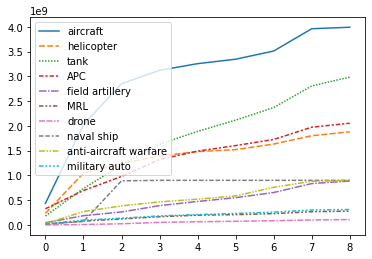

In [15]:
sns.lineplot(data=smo_equipment_value)

In [16]:
smo_equipment_value.to_csv('Visualization/cummulative_loss_value.csv')

In [17]:
greatest_losses_direction = greatest_losses_direction.dropna().reset_index(drop=True)

city_list = list(greatest_losses_direction['greatest losses direction'].unique())
city_list = city_list[1:]


# Counter(greatest_losses_direction['greatest losses direction'])
city_list

['Kurakhove and Izyum',
 'Zaporizhzhia and Izyum',
 'Izyum',
 'Izyum, Novopavlivsk',
 'Popasna',
 'Lyman and Kurakhove',
 'Slobozhanskyi',
 'Novopavlivsk',
 'Avdiivka',
 'Novopavlivsk, Kurakhove and Sievierodonetsk',
 'Kurakhove',
 'Kurakhove and Avdiivka',
 'Bakhmut and Zaporizhzhia',
 'Lyman and Zaporizhzhia',
 'Sloviansk, Kryvyi Rih and Zaporizhzhia',
 'Bakhmut',
 'Lyman',
 'Avdiivka and Kryvyi Rih',
 'Zaporizhzhia',
 'Kryvyi Rih and Zaporizhzhia',
 'Kryvyi Rih and Bakhmut',
 'Sloviansk',
 'Kharkiv and Bakhmut',
 'Sievierodonetsk and Bakhmut',
 'Bakhmut and Sievierodonetsk',
 'Sloviansk, Bakhmut and Kryvyi Rih',
 'Bakhmut and Avdiivka',
 'Sloviansk, Bakhmut and Avdiivka',
 'Sloviansk and Bakhmut',
 'Bakhmut and Kurakhove',
 'Kramatorsk and Bakhmut',
 'Sloviansk and Donetsk',
 'Avdiivka and Bakhmut',
 'Kramatorsk',
 'Mykolaiv',
 'Kramatorsk, Kryvyi Rih and Bakhmut',
 'Kryvyi Rih',
 'Donetsk',
 'Donetsk and Kryvyi Rih',
 'Bakhmut and Kryvyi Rih',
 'Bakhmut and Donetsk',
 'Kharkiv and 

In [18]:
ua_city = pd.read_csv('Raw Datasets/ua.csv')

In [19]:
ua_city[ua_city.iso2 == 'UA'].tail(5)

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
1464,Kazanka,47.8381,32.8261,Ukraine,UA,Mykolayivs’ka Oblast’,minor,NaN,NaN
1465,Mykolaivka,47.5389,30.7528,Ukraine,UA,Odes’ka Oblast’,minor,NaN,NaN
1466,Milove,49.3778,40.1306,Ukraine,UA,Luhans’ka Oblast’,minor,NaN,NaN
1467,Nyzhni Sirohozy,46.8395,34.3760,Ukraine,UA,Khersons’ka Oblast’,minor,NaN,NaN
1468,Ivanivka,46.7100,34.5500,Ukraine,UA,Khersons’ka Oblast’,minor,NaN,NaN


In [20]:
ua_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               1469 non-null   object 
 1   lat                1469 non-null   float64
 2   lng                1469 non-null   float64
 3   country            1469 non-null   object 
 4   iso2               1469 non-null   object 
 5   admin_name         1469 non-null   object 
 6   capital            320 non-null    object 
 7   population         1379 non-null   float64
 8   population_proper  1379 non-null   float64
dtypes: float64(4), object(5)
memory usage: 103.4+ KB


In [21]:
ua_city = ua_city.drop_duplicates(subset='city').reset_index(drop=True)

In [22]:
ua_city = ua_city.drop(['country', 'iso2', 'admin_name', 'capital', 'population'], axis=1)

In [23]:
ua_city.head(5)

,city,lat,lng,population_proper
0,Kyiv,50.4500,30.5236,2963199.0
1,Kharkiv,50.0000,36.2292,1446107.0
2,Odesa,46.4775,30.7326,1017699.0
3,Dnipro,48.4500,34.9833,1002111.0
4,Donetsk,48.0089,37.8042,929063.0


In [24]:
final_city_dict = {}
for index, row in ua_city.iterrows():
    i = 0
    for iindex, rrow in greatest_losses_direction.iterrows():
        if row['city'] in rrow['greatest losses direction']:
            i += 1
            final_city_dict[row['city']] = i
            

In [25]:
final_city_list = []
final_freq_list = []

for key, value in final_city_dict.items():
    final_city_list.append(key)
    final_freq_list.append(value)

In [26]:
ua_city = ua_city[ua_city['city'].isin(final_city_list)].reset_index(drop=True)
city_df = pd.DataFrame(data={'city name': final_city_list, 'frequency': final_freq_list}).sort_values(by='frequency', ascending=False).reset_index(drop=True)
ua_city = pd.concat([ua_city, city_df['frequency']], axis=1).reset_index(drop=True)
ua_city['population_proper'] = ua_city['population_proper'].astype('int64')
ua_city = ua_city.rename(columns={'lng': 'lon'}).reset_index(drop=True)
ua_city

,city,lat,lon,population_proper,frequency
0,Kharkiv,50.0000,36.2292,1446107,61
1,Donetsk,48.0089,37.8042,929063,54
2,Zaporizhzhia,47.8378,35.1383,741717,27
3,Kryvyi Rih,47.9086,33.3433,629695,22
4,Mykolaiv,46.9667,32.0000,498748,12
5,Kramatorsk,48.7208,37.5556,159445,11
6,Sievierodonetsk,48.9500,38.4833,150000,10
7,Sloviansk,48.8700,37.6250,113196,7
8,Bakhmut,48.6044,38.0067,75798,7
9,Avdiivka,48.1333,37.7500,34938,4


In [27]:
ua_city.to_csv('Visualization/most_contested_city.csv')